In [73]:
import pandas as pd
import numpy as np
import dataframe_image as dfi
import seaborn as sb
import matplotlib.pyplot as plt 
import matplotlib
from load_results import load_setup_1, load_setup_2, PARAM_COLUMNS, RESULT_COLUMNS
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load Results

In [2]:
df_full, df_params, df_results, df_to_eval = load_setup_1(False)
df_full.head()

,number,iteration,fitness_function,use_constraint,constraint_handling_method,constraint,particle_speed_limit,population_size,personal_confidence,swarm_confidence,particle_inertia,constraint_r,fitness,optimum,iterations,optimum_reached,iterations_to_opt
0,10001,1,Shubert function,False,-,-,13,5,0.5,1.5,0.1,-,0.622615,1.0,500,False,9
1,10002,1,Shubert function,False,-,-,13,5,1.0,1.0,0.1,-,0.662753,1.0,500,False,79
2,10003,1,Shubert function,False,-,-,13,5,1.5,0.5,0.1,-,0.649601,1.0,500,False,2
3,10004,1,Shubert function,False,-,-,13,5,0.5,1.5,0.5,-,0.623214,1.0,500,False,14
4,10005,1,Shubert function,False,-,-,13,5,1.0,1.0,0.5,-,0.623214,1.0,500,False,108


# Experiment Results

In [3]:
df_full[RESULT_COLUMNS].describe()

,fitness,iterations_to_opt
count,31474.000000,31474.000000
mean,0.891239,40.139353
std,0.167208,72.216293
min,0.451372,0.000000
25%,0.905600,8.000000
50%,0.990680,16.000000
75%,1.000000,38.000000
max,1.000000,499.000000


# Evaluation

## Confidence

In [88]:
def show_evaluation(df, feature='particle_inertia', use_constraint=False, average_constraint_handling=False, average_constraints=False, round_to=2, return_print=True):
    features = ['fitness_function', feature]
    
    if use_constraint:
        if not average_constraint_handling:
            features.append('constraint_handling_method')
            
        if not average_constraints:
            features.append('constraint')
    
    if return_print:
        return df[df.use_constraint].groupby(features)[RESULT_COLUMNS].mean().round(round_to).astype(str) + " +/- " + df[df.use_constraint].groupby(features)[RESULT_COLUMNS].std().round(round_to).astype(str) + " (" + df[df.use_constraint].groupby(features)[RESULT_COLUMNS].count().astype(str) + ")"

    return df[df.use_constraint].groupby(features)[RESULT_COLUMNS].mean()

In [89]:
particle_inertia_df = show_evaluation(df_full, use_constraint=True, average_constraint_handling=True, average_constraints=True, return_print=False)

In [37]:
dfi.export(particle_inertia_df, './plots/particle_inertia_const.png', dpi=300)

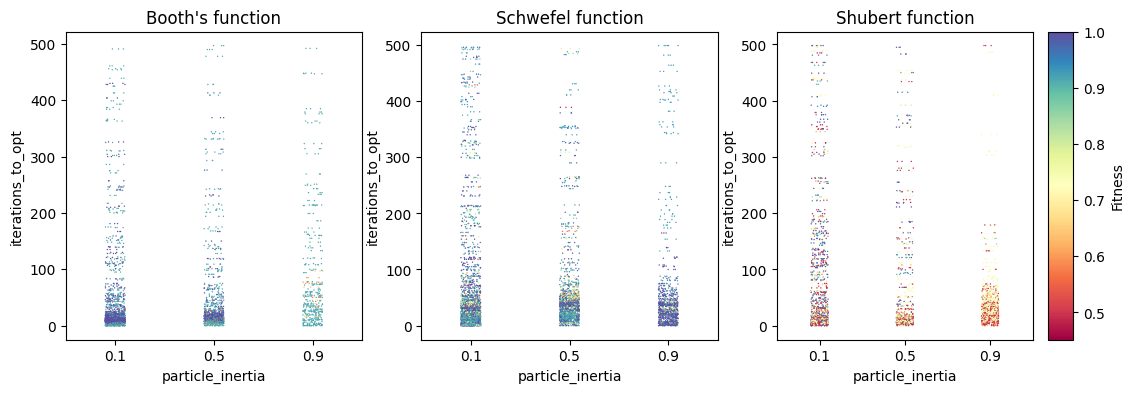

In [117]:
cmap = sb.color_palette("Spectral", as_cmap=True )

# Normalize to the range of possible values from df["c"]
norm = matplotlib.colors.Normalize(vmin=df_full["fitness"].min(), vmax=df_full["fitness"].max())
colors = {}
for cval in df_full["fitness"]:
    colors[cval] = cmap(norm(cval))
    
fig, axes = plt.subplots(1,3, figsize=(13,4))
plt1 = sb.stripplot(df_full[~df_full.optimum_reached & (df_full.fitness_function == "Booth's function")], x="particle_inertia", y="iterations_to_opt", hue="fitness", palette=colors, ax=axes[0], legend=False, size=1)
axes[0].set_title("Booth's function")

plt2 = sb.stripplot(df_full[~df_full.optimum_reached & (df_full.fitness_function == "Schwefel function")], x="particle_inertia", y="iterations_to_opt", hue="fitness", palette=colors, ax=axes[1], legend=False, size=1)
axes[1].set_title("Schwefel function")

plt3 =sb.stripplot(df_full[~df_full.optimum_reached & (df_full.fitness_function == "Shubert function")], x="particle_inertia", y="iterations_to_opt", hue="fitness", palette=colors, ax=axes[2], legend=False, size=1)
axes[2].set_title("Shubert function")

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="10%", pad=0.15)
fig.add_axes(ax_cb)
cb1 = matplotlib.colorbar.ColorbarBase(ax_cb, cmap=cmap,
                                norm=norm,
                                orientation='vertical')
cb1.set_label('Fitness')

<AxesSubplot: xlabel='particle_inertia', ylabel='iterations_to_opt'>

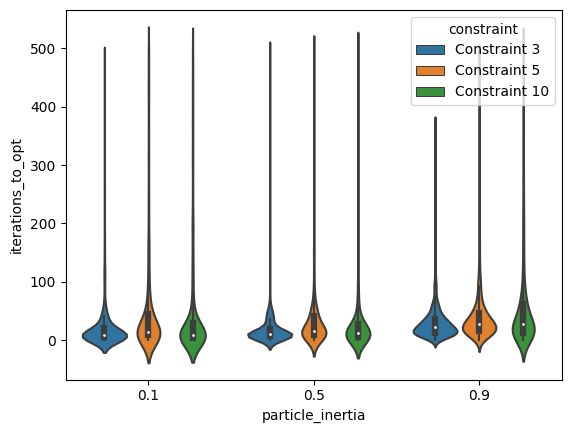

In [101]:
vp = sb.violinplot(df_full[df_full.use_constraint], x="particle_inertia", y="iterations_to_opt", hue="constraint")
vp

In [102]:
vp.get_figure().savefig("./plots/violinplot_constraint")

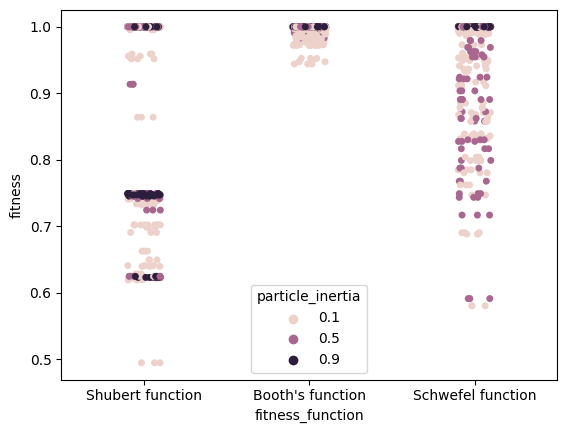

In [108]:
vp2 = sb.stripplot(df_full[~df_full.use_constraint], x="fitness_function", y="fitness", hue="particle_inertia")

In [109]:
vp2.get_figure().savefig("./plots/violinplot_inertia_no_constraint_fitness")

In [118]:
fig.savefig("./plots/stripplot_fitness_optimum_not_reached.pdf")

In [96]:
for val in df_full["fitness"]:
    print(val)
    break

0.6226150773201509


In [54]:
particle_inertia_df.index.get_level_values(0)

Index(['Booth's function', 'Booth's function', 'Booth's function',
       'Booth's function', 'Booth's function', 'Booth's function',
       'Booth's function', 'Booth's function', 'Booth's function',
       'Booth's function', 'Booth's function', 'Booth's function',
       'Booth's function', 'Booth's function', 'Booth's function',
       'Booth's function', 'Booth's function', 'Booth's function',
       'Schwefel function', 'Schwefel function', 'Schwefel function',
       'Schwefel function', 'Schwefel function', 'Schwefel function',
       'Schwefel function', 'Schwefel function', 'Schwefel function',
       'Schwefel function', 'Schwefel function', 'Schwefel function',
       'Schwefel function', 'Schwefel function', 'Schwefel function',
       'Schwefel function', 'Schwefel function', 'Schwefel function',
       'Shubert function', 'Shubert function', 'Shubert function',
       'Shubert function', 'Shubert function', 'Shubert function',
       'Shubert function', 'Shubert function

# Correlation

In [13]:
df_full.drop(columns=["use_constraint", "iterations"]).corr()

C:\Users\karst\AppData\Local\Temp\ipykernel_10864\2416084564.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.drop(columns=["use_constraint", "iterations"]).corr()


,particle_speed_limit,population_size,personal_confidence,swarm_confidence,particle_inertia,constraint_r,fitness,optimum,optimum_reached,iterations_to_opt
particle_speed_limit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population_size,NaN,1.000000e+00,2.245036e-15,-6.410103e-16,-9.345388e-18,4.087378e-15,0.152972,-3.012438e-15,0.382062,-0.186107
personal_confidence,NaN,2.245036e-15,1.000000e+00,-1.000000e+00,2.434700e-18,-1.553398e-17,-0.006594,1.699272e-16,-0.074630,0.129656
swarm_confidence,NaN,-6.410103e-16,-1.000000e+00,1.000000e+00,1.352611e-18,1.050828e-17,0.006594,2.464639e-16,0.074630,-0.129656
particle_inertia,NaN,-9.345388e-18,2.434700e-18,1.352611e-18,1.000000e+00,-6.282126e-18,0.061281,9.439959e-18,0.386373,-0.027106
constraint_r,NaN,4.087378e-15,-1.553398e-17,1.050828e-17,-6.282126e-18,1.000000e+00,0.018253,8.667159e-17,0.008099,-0.056173
fitness,NaN,1.529724e-01,-6.593725e-03,6.593725e-03,6.128127e-02,1.825301e-02,1.000000,8.770338e-01,0.196999,-0.016953
optimum,NaN,-3.012438e-15,1.699272e-16,2.464639e-16,9.439959e-18,8.667159e-17,0.877034,1.000000e+00,-0.013000,0.043813
optimum_reached,NaN,3.820622e-01,-7.463049e-02,7.463049e-02,3.863727e-01,8.098888e-03,0.196999,-1.299964e-02,1.000000,-0.210113
iterations_to_opt,NaN,-1.861066e-01,1.296556e-01,-1.296556e-01,-2.710574e-02,-5.617346e-02,-0.016953,4.381324e-02,-0.210113,1.000000


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


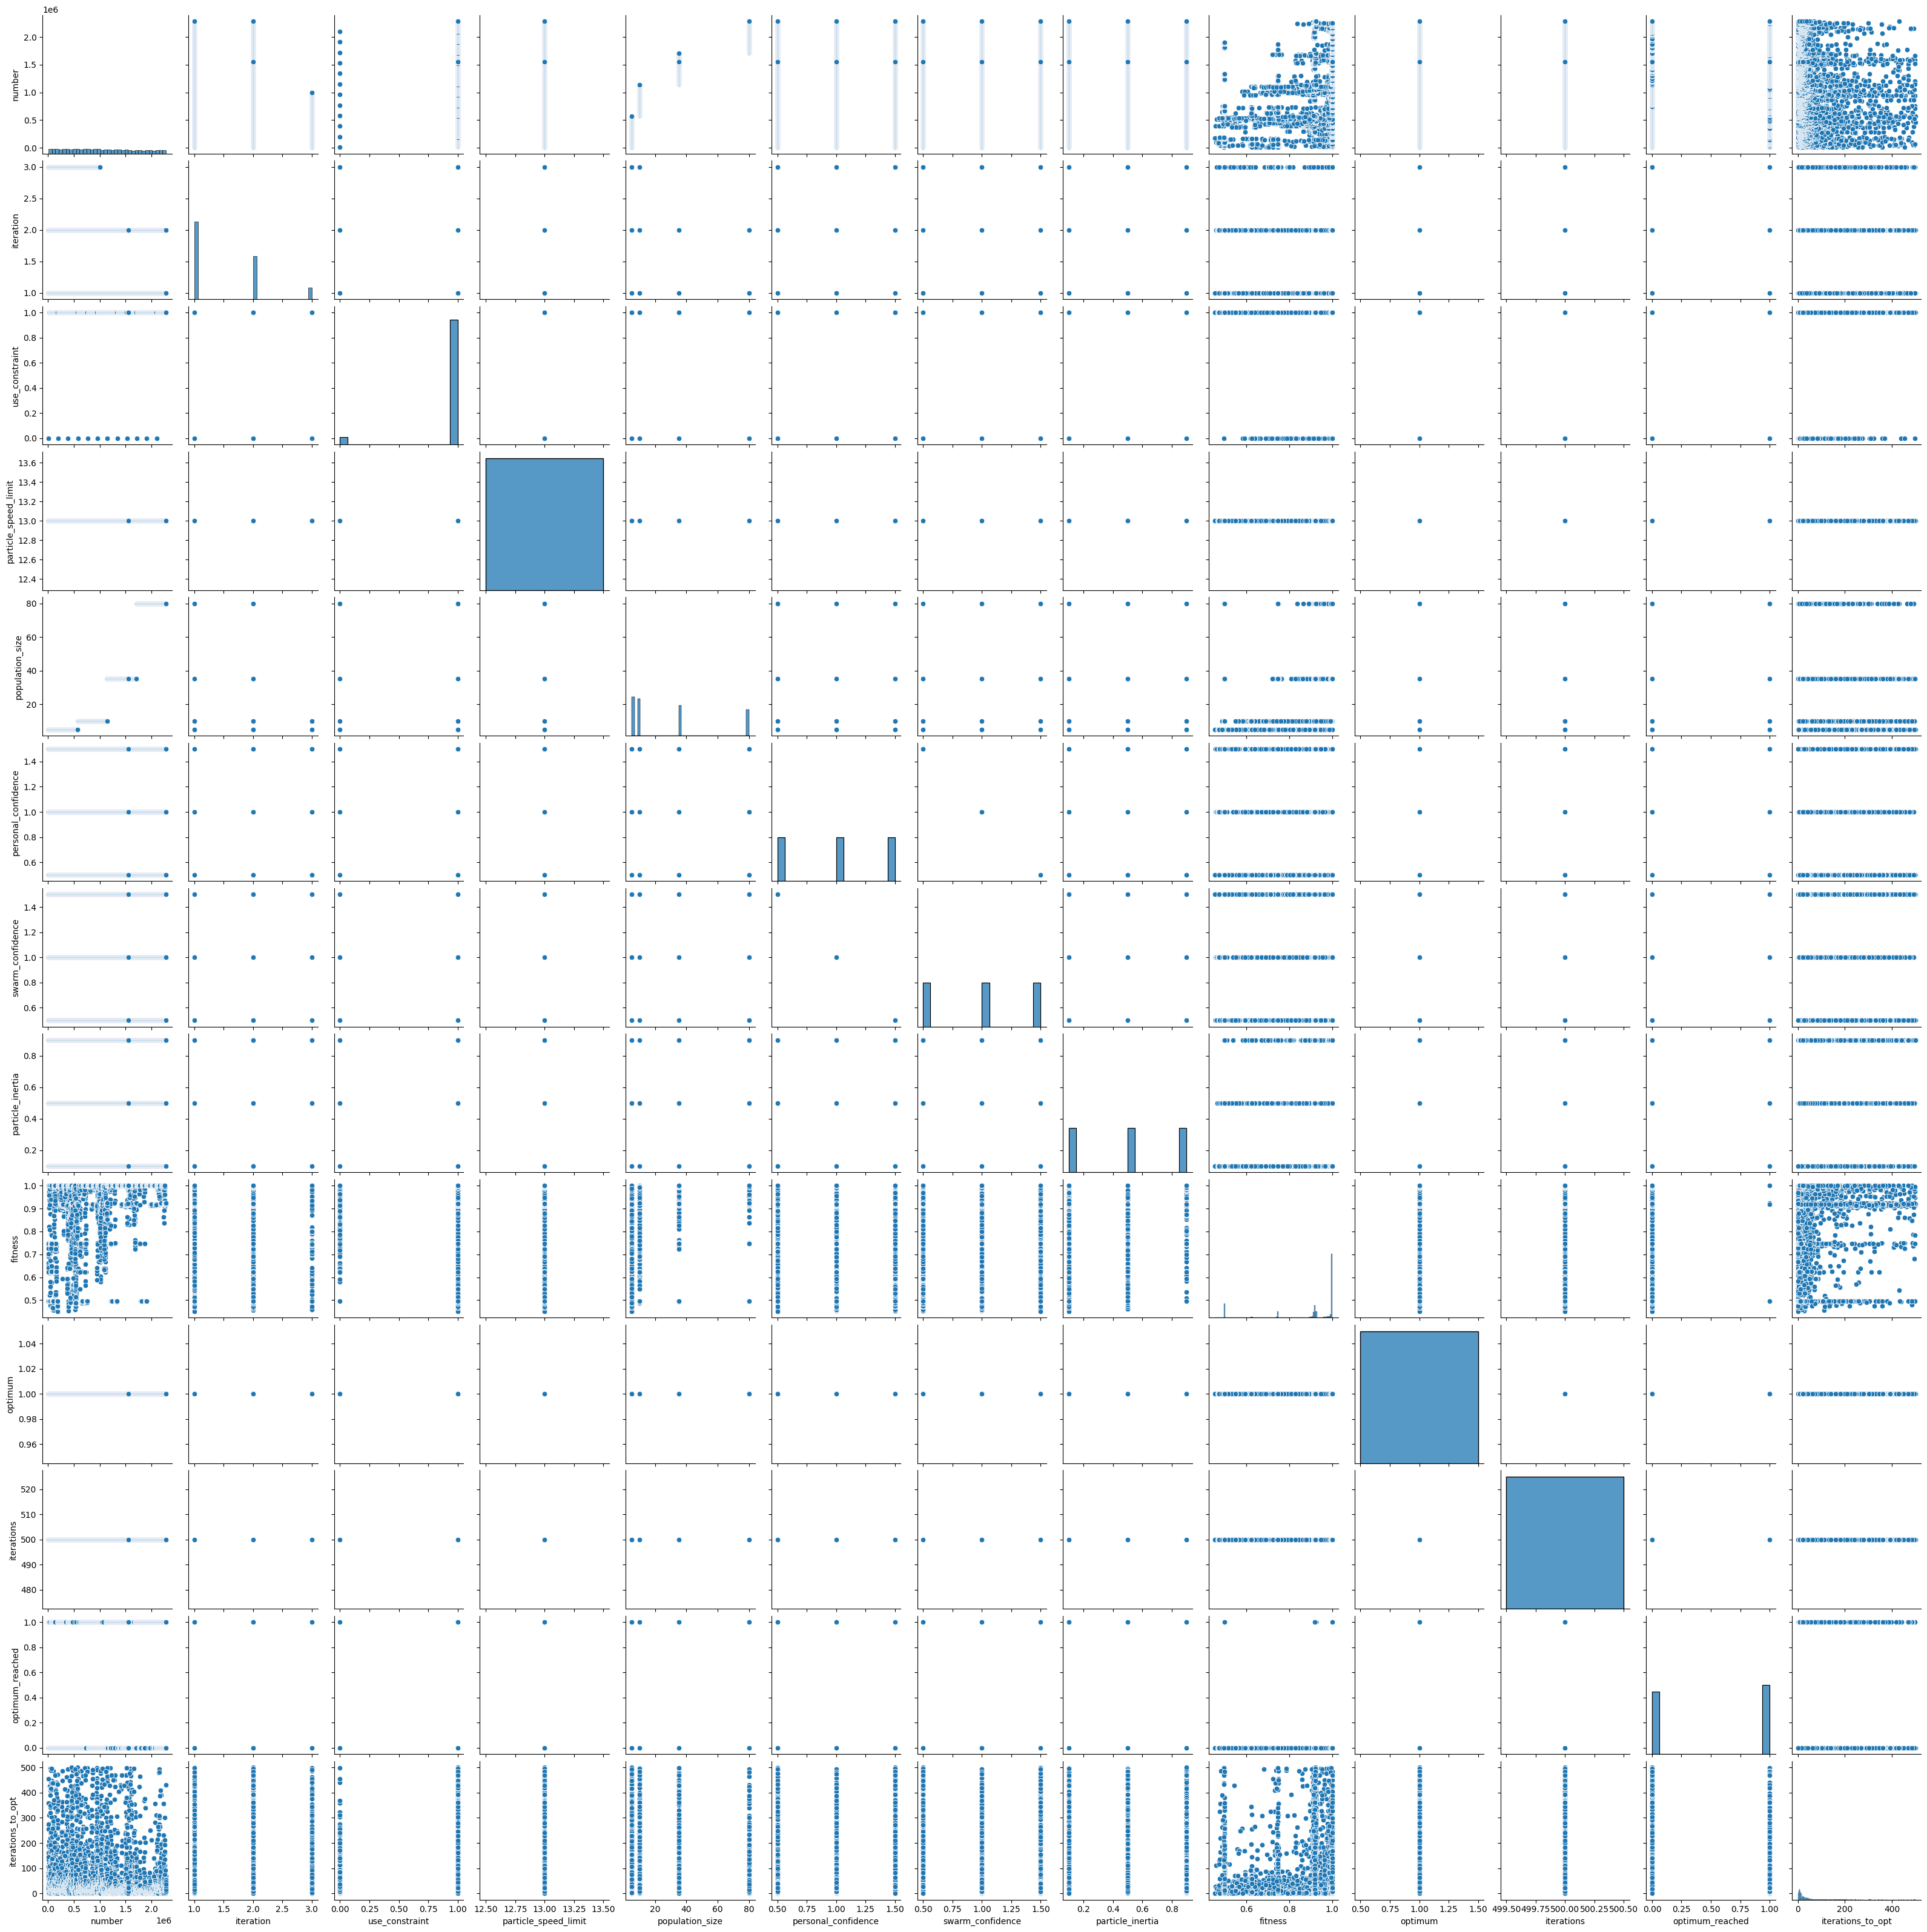

In [99]:
sb.pairplot(df_full)